In [ ]:
Student ID#: 260570652, Name: Luke Steverango

In [4]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
import numpy as np
import matplotlib.pyplot as plt
import random as rn

We study the effect of inexact arithmetic on computation of the exponential series

$$
e^x = 1 + x + \frac{x^2}2 + \frac{x^3}{3!} + \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 + x + \frac{x^2}2 + \ldots \frac{x^n}{n!} .
$$

Each term of the Taylor polynomial is computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.
We can think of $\varepsilon$ as modeling the machine precision.
A typical choice below is $\varepsilon=0.1$.
This of course greatly exaggaretes roundoff errors, but illustrates the phenomenon nicely.
In this setting, the built-in computation of $e^x$ can be taken as exact.


* $\texttt{expser}(n,x,\varepsilon)$ computes $T_n(x)$ with each of its term having random error, 
uniformly distributed with relative amplitude $\varepsilon$.
* $\texttt{expserlist}(n,xlist,\varepsilon)$ is a version of $\texttt{expser}(n,x,\varepsilon)$ that works with a list of $x$.
* The next 3 functions work with lists of $x$, $n$, and $\varepsilon$, respectively, 
but they all compute $e^x-T_n(x)$, where $T_n(x)$ has the aforementioned perturbation. 



In [28]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [25]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [7]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [8]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [9]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

No handles with labels found to put in legend.


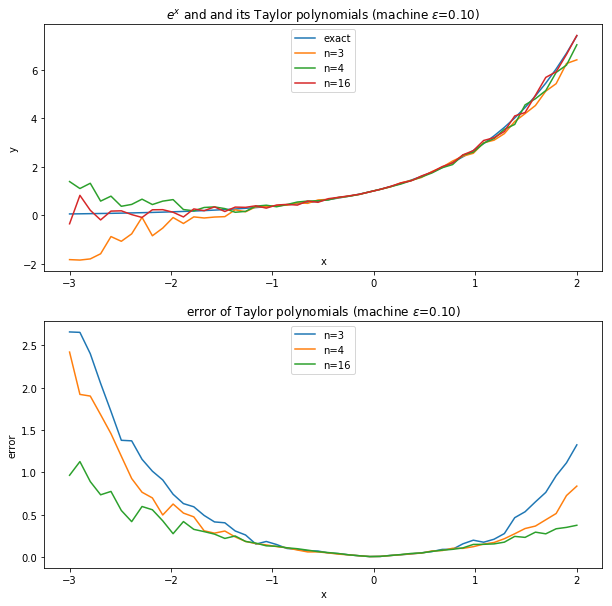

In [10]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

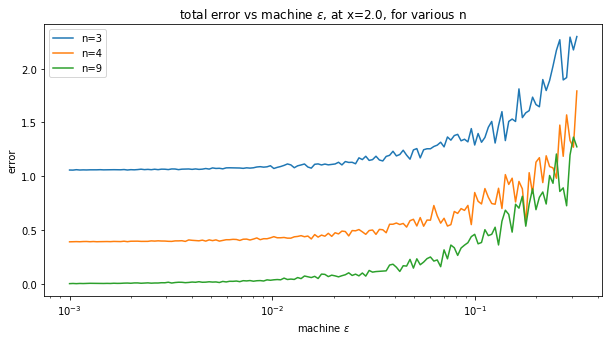

In [11]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(errelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

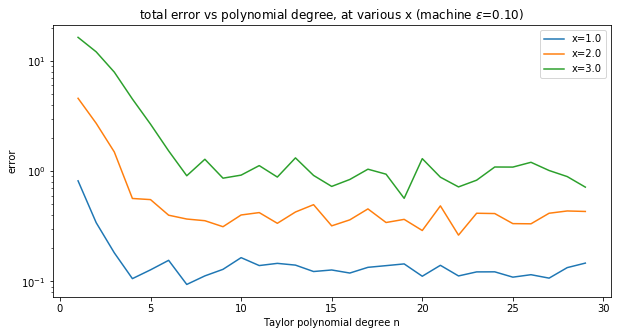

In [12]:
xlist = [1,2,3]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

Q1: Part 2

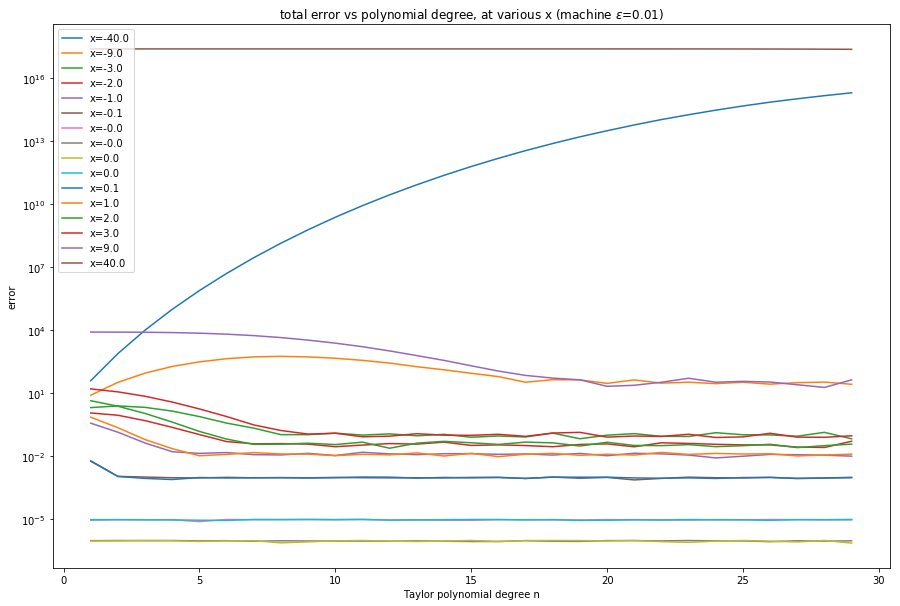

In [13]:
xlist = [-40,-9,-3,-2,-1,-0.1,-0.001,-0.0001,0.0001,0.001,0.1,1,2,3,9,40]
nlist=range(1,30)
eps=.01
kmax=20

plt.figure(figsize=(15,10))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

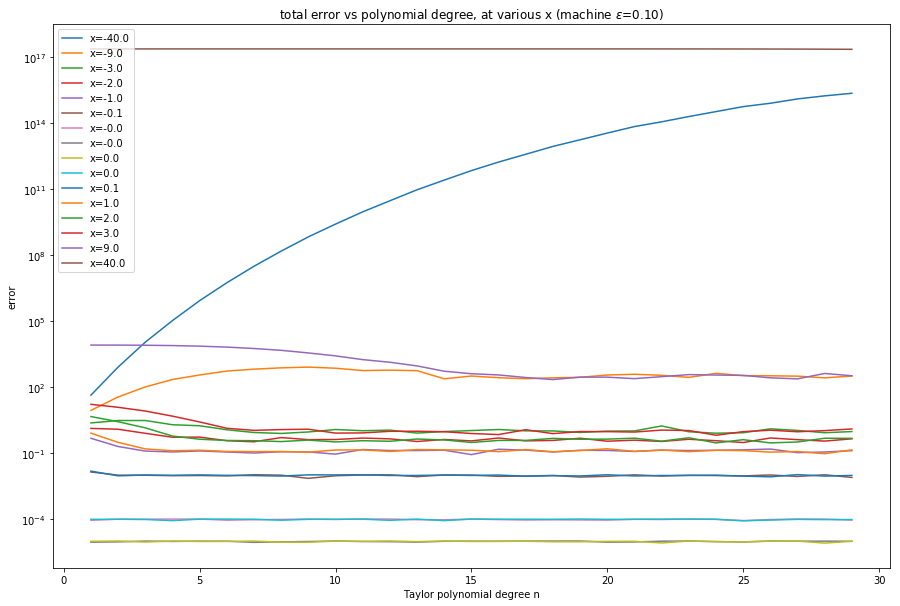

In [14]:
xlist = [-40,-9,-3,-2,-1,-0.1,-0.001,-0.0001,0.0001,0.001,0.1,1,2,3,9,40]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(15,10))
for x in xlist:
    y=np.abs(errnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(errnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

As one can see from the above plots if we take $|x| >> 1$ then the time it takes for it to reach a stable level of accuracy is longer than for those polynomials whose $|x| << 1$. It also seems to be that, $\epsilon$ does seem to affect the degree of polynomial it takes for it to reach a stable level, depending on the size of $x$. In the above plots the bigger polynomial given and the smaller the $\epsilon$ value, the longer it takes. For example, in the above plots if you consider $\epsilon = 0.1$, for $|x| = 9$ we have that $n \approx 15$ before the accuracy stabilizes, but for $\epsilon = 0.01$ we have that it takes until $n \approx 19$. In contrast, if $|x| << 1$, the changes are not noticeable.

Next is Q1: Part 3

In [15]:
def relaterrxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(((expser(n,x,eps)-np.exp(x))/np.exp(x)))
    return yy

In [16]:
def relaterrelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(((expser(n,x,eps)-np.exp(x))/np.exp(x)))
    return yy

In [17]:
def relaterrnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(((expser(n,x,eps)-np.exp(x))/np.exp(x)))
    return yy

No handles with labels found to put in legend.


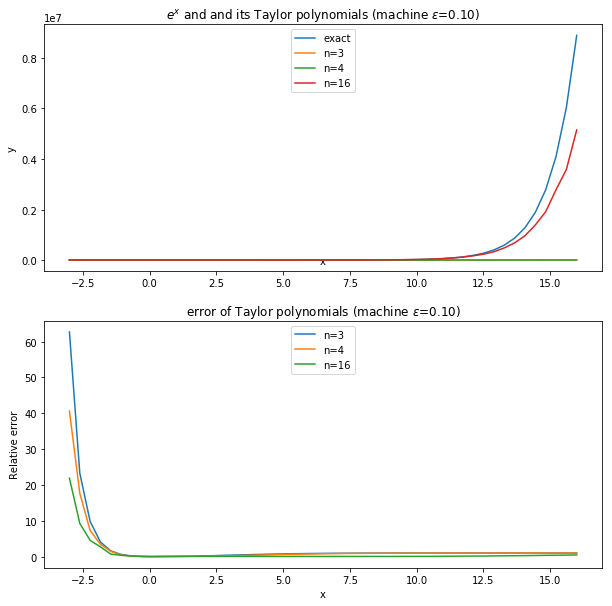

In [20]:
xlist = np.linspace(-3, 16, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(relaterrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(relaterrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('Relative error')
ax2.legend(loc="upper center")
plt.show()

As one can see, for the second plot, it is very similar to the absolute error plot. It first starts off shaky, but eventually for all $n$ values the relative error goes to $0$ around $x \approx 0$. However, unlike the absolute error, it does not split again for positive $x$. This is due to the fact that $e^x$ grows rapidly causing the relative error term to be kept small.

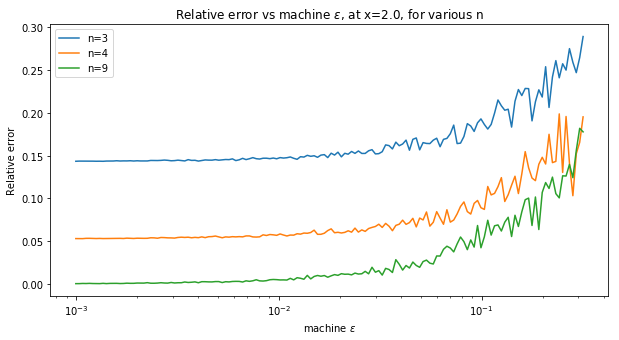

In [21]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(relaterrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(relaterrelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'Relative error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('Relative error')
plt.legend()
plt.show()

In a flip of the total error, the relative error for all $n$ starts off rather stable and as the machine $\epsilon$ gets bigger the relative error fluctuates more. It also makes sense that as you add more degrees to the polynomial, the relative error would go down, similar to absolute error in that regard. 

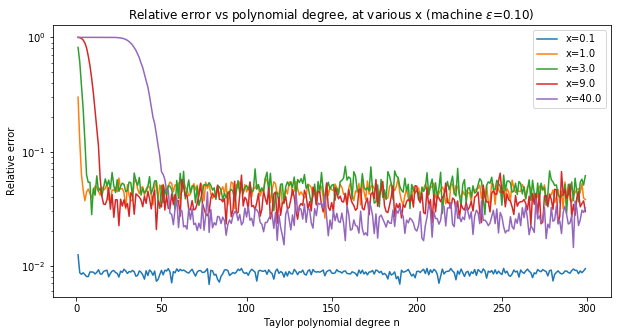

In [54]:
xlist = [0.1,1,3,9,40]
nlist=range(1,300)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(relaterrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(relaterrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('Relative error')
plt.legend()
plt.show()

This plot is very similar to the absolute error plots, but in this case the relative error has a lot more noise associated with it. However, a relatively stable equilibrium is achieved at some point.

Q1:Part 4

We study the effect of inexact arithmetic on computation of the Maclaurin series for cosine.

$$
cos(x) = 1 - \frac{x^2}2 + \frac{x^4}{4!} - \ldots .
$$

which is approximated by the Taylor polynomial

$$
T_n(x) = 1 - \frac{x^2}2 + \frac{x^4}{4!} - \ldots + (-1)^{n}\frac{x^{2n}}{(2n)!} .
$$

Each term of the Taylor polynomial is again computed with random error, 
uniformly distributed with relative amplitude $\varepsilon$.


In [50]:
def cosser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for cos(x)
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1. 
    y=b #First term of cosine series is 1
    for i in range(1,n+1):
        b*=(((-1)**i)*float(x**2)/(2*i)) #Calculation of the cos(x) higher order terms
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [51]:
def cosserlist(n,xlist,eps=0): #the polynomial above, but works with a list
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(cosser(n,x,eps))
    return ylist

In [52]:
def coserrxlist(n,xlist,eps): #cos error works with a list of x
#difference between Tn(x) and cos(x)
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(cosser(n,x,eps)-np.cos(x))
    return yy

In [57]:
def coserrelist(n,x,elist): #cos error works with a list of epsilon
#difference between Tn(x) and cos(x)
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(cosser(n,x,eps)-np.cos(x))
    return yy

In [58]:
def coserrnlist(nlist,x,eps): #cos error works with a list of n
#difference between Tn(x) and cos(x)
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(cosser(n,x,eps)-np.cos(x))
    return yy

No handles with labels found to put in legend.


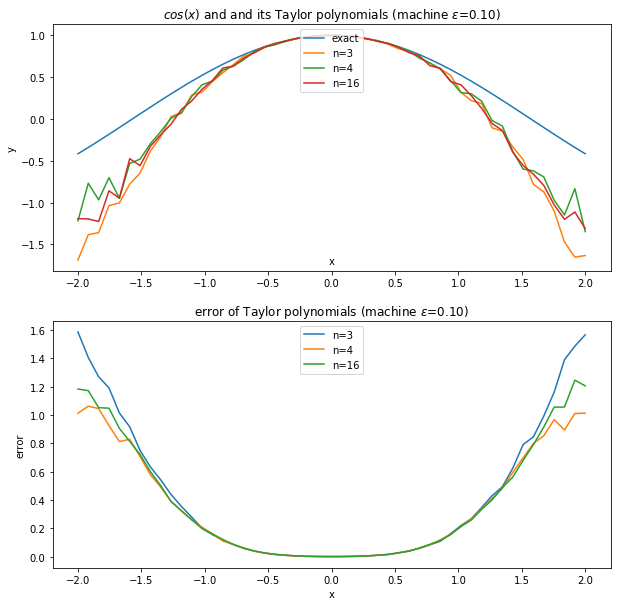

In [59]:
xlist = np.linspace(-2, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(xlist,np.cos(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,cosserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(coserrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(coserrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$cos(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
plt.show()

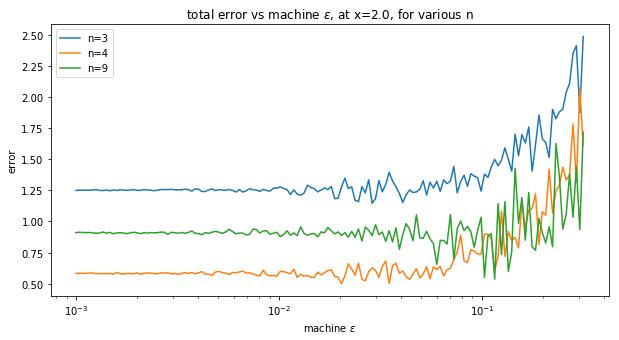

In [63]:
nlist = [3,4,9]
elist = np.logspace(-3, -.5, 150)
x=2.
kmax=20

plt.figure(figsize=(10,5))
for n in nlist:
    y=np.abs(coserrelist(n,x,elist))
    for k in range(1,kmax):
        z=np.abs(errelist(n,x,elist))
        y=np.maximum(y,z)
    plt.plot(elist,y,label='n=%d'%n)

plt.xscale('log')
plt.title(r'total error vs machine $\varepsilon$, at x=%.1f, for various n'%x)
plt.xlabel(r'machine $\varepsilon$')
plt.ylabel('error')
plt.legend()
plt.show()

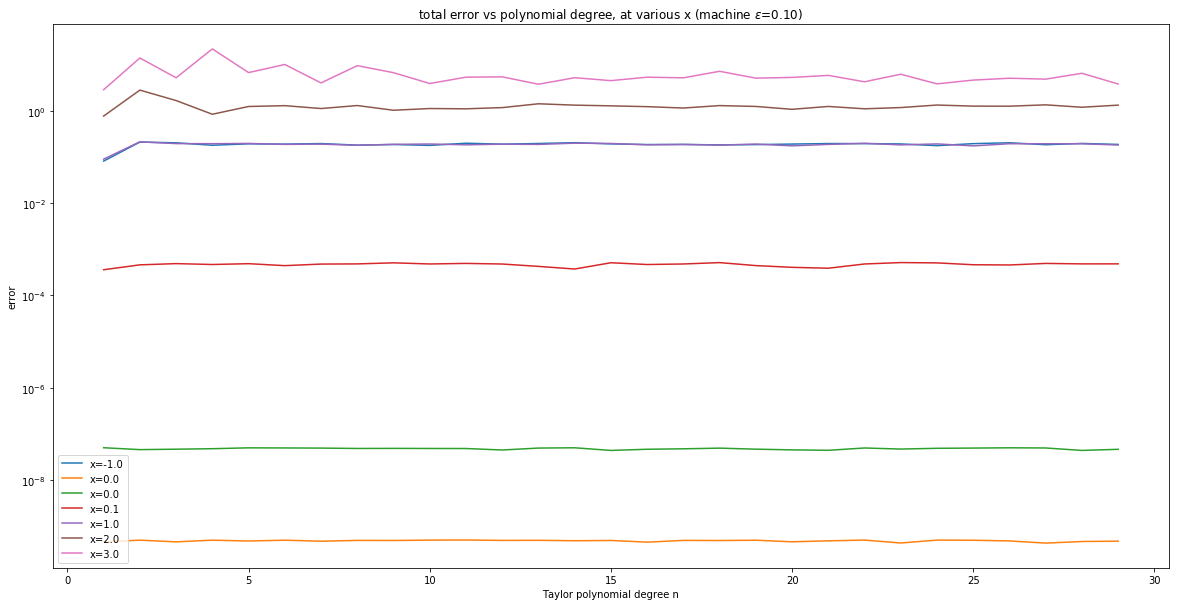

In [79]:
xlist = [-1,0.0001,0.001,0.1,1,2,3]
nlist=range(1,30)
eps=.1
kmax=20

plt.figure(figsize=(20,10))
for x in xlist:
    y=np.abs(coserrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(coserrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('error')
plt.legend()
plt.show()

As is exhibited by the plot above, the total error explodes for $|x| >> 1$ the total error is rather stagnant but way larger, but for $|x| << 1$ the error is rather small, and almost nonexistent for $x \rightarrow 0$. This implies the importance, of reducing the argument of $x$ in cossine so as to avoid the egregious error for large $x$. As we can also see, the amount of error is independent of sign choice, as exhibited by $x = -1.0$ and $x = 1.0$ above. As for $\epsilon$, if $\epsilon$ is larger then it causes more fluctuations in the error for higher values of $x$.

In [69]:
def relatcoserrxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(((cosser(n,x,eps)-np.exp(x))/np.cos(x)))
    return yy

In [70]:
def relatcoserrelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(((cosser(n,x,eps)-np.exp(x))/np.cos(x)))
    return yy

In [71]:
def relatcoserrnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(((cosser(n,x,eps)-np.exp(x))/np.cos(x)))
    return yy

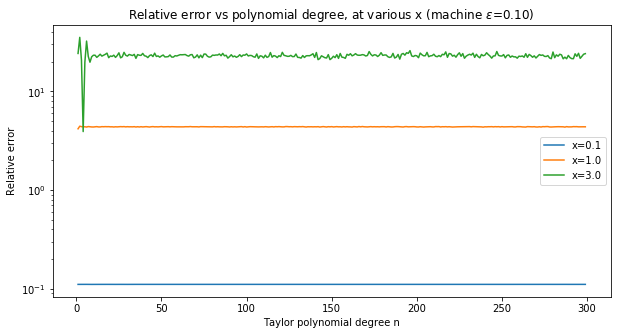

In [77]:
xlist = [0.1,1,3]
nlist=range(1,300)
eps=.1
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(relatcoserrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(relatcoserrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('Relative error')
plt.legend()
plt.show()

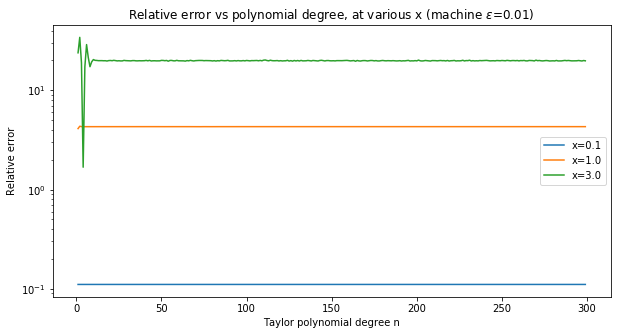

In [76]:
xlist = [0.1,1,3]
nlist=range(1,300)
eps=.01
kmax=20

plt.figure(figsize=(10,5))
for x in xlist:
    y=np.abs(relatcoserrnlist(nlist,x,eps))
    for k in range(1,kmax):
        z=np.abs(relatcoserrnlist(nlist,x,eps))
        y=np.maximum(y,z)
    plt.plot(nlist,y,label='x=%.1f'%x)

plt.yscale('log')
#plt.xscale('log')
plt.title(r'Relative error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%eps)
plt.xlabel('Taylor polynomial degree n')
plt.ylabel('Relative error')
plt.legend()
plt.show()

As we can see above, for the relative error, again for $|x| \leq 1$ we have that the relative error is rather small and stable, and for $|x| > 1$ we have a higher relative error. Note the greater the $\epsilon$, the more noise is present for larger values of $x$ as in the case of absolute error.